# DEA accredited proejcts analysis 2019-2025

## import libraries and data

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [261]:
df = pd.read_csv('C:/Users/balin/Desktop/ADR_DEA_project/data/dea_accredited_projects.csv')

In [262]:
df.head()

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date
0,2019/003,The fall of the labour share and rise of the s...,"Carolin Ioramashvili, London School of Economics",Digital Economy Act (2017),Office for National Statistics: Annual Respond...,Office for National Statistics Secure Research...,10/25/2019
1,2019/004,The changing nature of the HR and training pra...,"Jonathan Boys, Chartered Institute of Personne...",Digital Economy Act (2017),Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,10/25/2019
2,2019/006,Analysis of victimisation data from the Crime ...,"Julian Molina, Office of the Victims' Commissi...",Digital Economy Act (2017),Office for National Statistics: Crime Survey f...,Office for National Statistics Secure Research...,10/14/2019
3,2019/007,Thriving Places index – indicators of wellbein...,"Soraya Safazadeh, Happy City Initiative\nSaama...",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,10/14/2019
4,2019/008,Class in UK creative industries: Beyond partic...,"Rebecca Florisson, The Work Foundation",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,11/19/2019


## Tidy the data

In [263]:
df.isna().sum()

Project ID                 0
Title                      0
Researchers                2
Legal Basis                0
Datasets Used              1
Secure Research Service    0
Accreditation Date         0
dtype: int64

In [264]:
missing_researchers = df[df['Researchers'].isna()]

In [265]:
missing_datasets = df[df['Datasets Used'].isna()]

In [266]:
# Drop rows with missing datasets used
df = df.dropna(subset=['Datasets Used'])

In [267]:
df.head()

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date
0,2019/003,The fall of the labour share and rise of the s...,"Carolin Ioramashvili, London School of Economics",Digital Economy Act (2017),Office for National Statistics: Annual Respond...,Office for National Statistics Secure Research...,10/25/2019
1,2019/004,The changing nature of the HR and training pra...,"Jonathan Boys, Chartered Institute of Personne...",Digital Economy Act (2017),Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,10/25/2019
2,2019/006,Analysis of victimisation data from the Crime ...,"Julian Molina, Office of the Victims' Commissi...",Digital Economy Act (2017),Office for National Statistics: Crime Survey f...,Office for National Statistics Secure Research...,10/14/2019
3,2019/007,Thriving Places index – indicators of wellbein...,"Soraya Safazadeh, Happy City Initiative\nSaama...",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,10/14/2019
4,2019/008,Class in UK creative industries: Beyond partic...,"Rebecca Florisson, The Work Foundation",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,11/19/2019


In [268]:
df['Legal Basis'].value_counts()

Legal Basis
Digital Economy Act (2017)                                                                                                                                                                                                                                                       1023
Statistics and Registration Services Act 2007 (SRSA) - Approved Researcher Gateway: added data after 9 September 2021                                                                                                                                                              98
Digital Economy Act 2017                                                                                                                                                                                                                                                           18
Statistics and Registration Services Act 2007 (SRSA) - Approved Researcher Gateway: added data after 9 September 2021s Act 2007 (SRSA) - Approved Research

What's the difference between the DEA and SRSA? 
| Aspect                       | **SRSA (2007)**                                   | **DEA (2017)**                                                 |
| ---------------------------- | ------------------------------------------------- | -------------------------------------------------------------- |
| **Legal Authority**          | Statistics and Registration Service Act 2007      | Digital Economy Act 2017 – Chapter 5 (Research Strand)         |
| **Main Data Custodian**      | Office for National Statistics (ONS) only         | Any specified public authority (incl. ONS, NHS, DWP, etc.) |
| **Scope of Data Sharing**    | ONS data only                                     | Cross-government administrative data                           |
| **Type of Research**         | Purely **statistical** purposes                   | Broader research (including policy evaluation)             |
| **Researcher Accreditation** | Required – via UK Statistics Authority (UKSA)     | Required – same UKSA framework                                 |
| **Secure Access Required**   | Yes (e.g. Secure Research Service)                | Yes (e.g. via an accredited processor or secure lab)           |
| **Public Benefit Test**      | Yes                                               | Yes                                                            |
| **Data Sharing Permissions** | Limited to non-identifying, statistical data only | Can include de-identified **admin** data for wider use         |
| **Oversight Body**           | UK Statistics Authority (and ONS)                 | UK Statistics Authority (with DEA Governance Board input)      |




In [269]:
# Clean Legal Basis column by removing SRSA rows
df = df[~df['Legal Basis'].str.contains('SRSA', na=False)]
# tidy up DEA labels
df['Legal Basis'] = df['Legal Basis'].str.replace('Digital Economy Act (2017)', 'Digital Economy Act 2017')
df['Legal Basis'].value_counts()

Legal Basis
Digital Economy Act 2017    1041
Name: count, dtype: int64

In [270]:
df.isna().sum()

Project ID                 0
Title                      0
Researchers                2
Legal Basis                0
Datasets Used              0
Secure Research Service    0
Accreditation Date         0
dtype: int64

In [271]:
df["datasets_clean"] = (
    df["Datasets Used"]
    .str.lower()
    .str.replace("\n", "; ", regex=False)  # replace newlines with semicolon
    .str.replace(r"\s*,\s*", ", ", regex=True)  # normalize commas
    .str.replace(r"\s*:\s*", ": ", regex=True)  # normalize colons
)

In [272]:
def extract_datasets(row):
    results = []
    for entry in row.split(";"):
        if ":" in entry:
            owner, datasets = entry.split(":", 1)
            dataset_list = [ds.strip() for ds in datasets.split(",")]
            results.extend(dataset_list)
    return results

df["dataset_list"] = df["datasets_clean"].apply(lambda x: extract_datasets(x))

In [273]:
example_row_mulitple_datasets = df.iloc[6]

In [274]:
df[df["dataset_list"].apply(lambda x: isinstance(x, list) and len(x) == 0)]

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,datasets_clean,dataset_list
424,2022/127,Estimating capital utilisation for productivit...,"Josh Martin, Bank of England\nCain Baybutt, Of...",Digital Economy Act 2017,"Annual Population Survey, Labour Force Survey ...",Office for National Statistics Secure Research...,09/06/2022,"annual population survey, labour force survey ...",[]
461,2022/156,Impact of Technologies on Productivity and Peo...,"Karolis Matikonis, Queen's University Belfast",Digital Economy Act 2017,"Northern Ireland Annual Business Inquiry , Bro...",Northern Ireland Statistics and Research Agency,10/04/2022,"northern ireland annual business inquiry, broa...",[]


In [275]:
# Data owners are missing from the Datasets Used column. For these rows, just fill dataset_list with the split datasets_clean value
df.loc[
    df["dataset_list"].apply(lambda x: isinstance(x, list) and len(x) == 0),
    "dataset_list"
] = df.loc[
    df["dataset_list"].apply(lambda x: isinstance(x, list) and len(x) == 0),
    "datasets_clean"
].apply(lambda x: [ds.strip() for ds in x.split(",") if ds.strip()])

In [276]:
df_exploded = df.explode("dataset_list")
df_exploded.isna().sum()

Project ID                 0
Title                      0
Researchers                2
Legal Basis                0
Datasets Used              0
Secure Research Service    0
Accreditation Date         0
datasets_clean             0
dataset_list               0
dtype: int64

In [277]:
all_datasets_df = df_exploded['dataset_list'].value_counts().reset_index()
all_datasets_df.columns = ['dataset', 'count']

## Overall use of different datasets

In [278]:
all_datasets_df.head()

,dataset,count
0,business structure database,120
1,annual business survey,117
2,annual population survey,93
3,annual survey of hours and earnings,85
4,business structure database - uk,83


### Overall use of ADR UK flagship datasets

## Use of datasets over time

In [253]:
# Convert accreditation date to datetime
df['Accreditation Date'] = pd.to_datetime(df['Accreditation Date'], errors='coerce')
df['Year'] = df['Accreditation Date'].dt.year

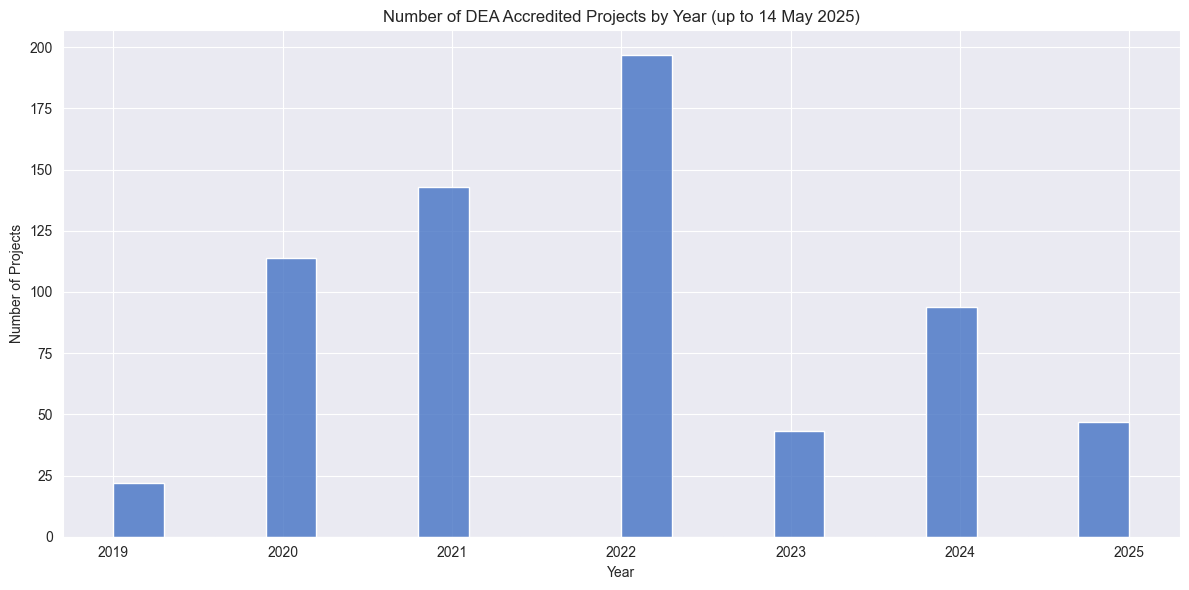

In [254]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.histplot(df['Year'], bins=20, color='#4472C4', 
    alpha=0.8,
    edgecolor='white',
    linewidth=1)
plt.title('Number of DEA Accredited Projects by Year (up to 14 May 2025)')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.tight_layout()

In [255]:
# ADR UK flagship datasets
flagship_datasets = ['agricultural research collection']

In [256]:
df_exploded[df_exploded['dataset_list'].str.contains('agricultural research collection', case=False, na=False)]

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,datasets_clean,dataset_list
425,2022/129,AD|ARC : Linking Individual and Farm Level Dat...,"Nicholas Webster, Welsh Government\nMatthew Ke...",Digital Economy Act 2017,Office for National Statistics: Agricultural R...,Office for National Statistics Secure Research...,11/09/2022,office for national statistics: agricultural r...,agricultural research collection
575,2023/076,AD|ARC (Administrative Data Agri-Research Coll...,"Nicholas Webster, Welsh Government\nSian Morri...",Digital Economy Act 2017,"Department for Environment, Food & Rural Affai...",Office for National Statistics Secure Research...,2023-05-24,"department for environment, food & rural affai...",bespoke admin data: agricultural research coll...
